# 군집 알고리즘

## 과일 사진 데이터 준비하기

In [3]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [5]:
import requests

# URL
url = "https://bit.ly/fruits_300_data"

# 파일 다운로드
response = requests.get(url)

# 파일을 binary 형태로 저장
with open('fruits_300.npy', 'wb') as file:
    file.write(response.content)

print("파일 다운로드 완료!")

파일 다운로드 완료!


In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# 'fruits_300.npy' 파일을 읽어서 그 내용을 fruits라는 변수에 NumPy 배열로 저장
fruits = np.load('fruits_300.npy')

In [11]:
print(fruits.shape)
# (개수, 이미지의 가로의 크기, 이미지의 세로의 크기)
# (300, 100, 100)

(300, 100, 100)


In [13]:
# 첫 번째 이미지의 첫 번째 행에 있는 모든 열 값을 출력하는 코드
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


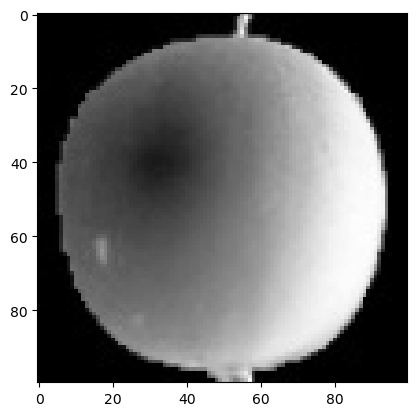

In [47]:
# plt.imshow() : 이미지를 화면에 표시하는 함수
# fruits[0] : fruits의 첫번째 이미지를 표시
# cmap = 'gray'
plt.imshow(fruits[0], cmap='gray')
plt.show()

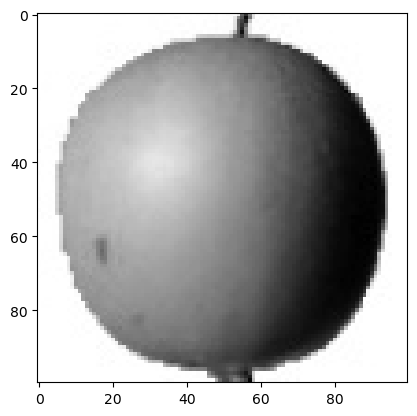

In [51]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

| **색상 맵 (cmap)** | **설명**                                | **사용 예시**                          |
|------------------|---------------------------------------|--------------------------------------|
| **'gray'**       | 흑백 (그레이스케일) 이미지               | 회색 음영으로 이미지를 표시          |
| **'binary'**     | 이진 (binary) 색상 맵                  | 0은 검은색, 1은 흰색으로 표시        |
| **'bone'**       | 뼈 색깔 톤                              | 회색조와 부드러운 색감을 사용        |
| **'copper'**     | 구리 색상 톤                            | 주황색과 갈색 색조를 사용             |
| **'pink'**       | 핑크 톤                                 | 부드러운 핑크색 톤                   |
| **'viridis'**    | 기본 색상 맵 (어두운 보라에서 밝은 노란색으로 변화) | Matplotlib 기본 색상 맵                |
| **'plasma'**     | 강렬한 색상 맵 (보라에서 노란색)           | 강렬하고 대조적인 색상                 |
| **'inferno'**    | 강렬하고 어두운 색상 맵 (붉은색에서 노란색으로 변화) | 주로 고온 분포를 나타내는 데이터에 사용 |
| **'magma'**      | 어두운 색상 맵 (어두운 보라에서 밝은 노란색으로 변화) | 열 분포 데이터에 유용                 |
| **'cividis'**    | 색상 맹인 친화적 색상 맵                | 색상 맹인도 인식할 수 있는 색상 맵   |
| **'RdBu'**       | 구간별 색상 맵 (빨강에서 파랑으로 변화)   | 차가운 값과 따뜻한 값을 구분할 때 사용 |
| **'coolwarm'**   | 차가운 색상(파랑)과 따뜻한 색상(주황) 사이의 색상 맵 | 온도 차이를 시각화하는 데 유용         |
| **'Spectral'**   | 다채로운 색상 맵                       | 여러 범주를 구분하는 데 유용           |
| **'twilight'**   | 연속적인 색상 맵 (부드러운 색상 변화)   | 연속적인 데이터에 사용               |
| **'twilight_shifted'** | 'twilight' 색상 맵을 변형한 버전       | 시프트된 색상 변화                   |
| **'jet'**        | 과거에 많이 사용되던 색상 맵 (빨강, 초록, 파랑 등 빠르게 변화) | 자주 사용되지 않음, 권장되지 않음     |


'_r'을 붙이면 색상이 반전됨.

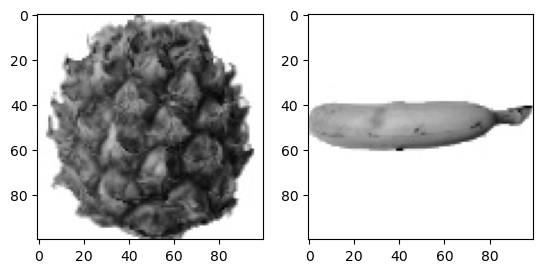

In [19]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

## 픽셀값 분석하기

In [24]:
# fruits[0:100] : fruits 배열에서 첫 번째부터 100번째까지, 즉 100개의 이미지를 선택
# reshape(-1, 100*100): (1, 10000) 크기의 배열로 변환
#                       여기서 10000은 100 * 100이기 때문에, 하나의 이미지는 이제 10000개의 특성(픽셀 값)으로 나타내게 됨
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

# 0~100은 apple, 100~200은 파인애플, 200~300은 바나나라는 전제

In [26]:
print(apple.shape)
# (100, 10000)

(100, 10000)


In [28]:
# 행 단위로 평균값을 계산하는 코드
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


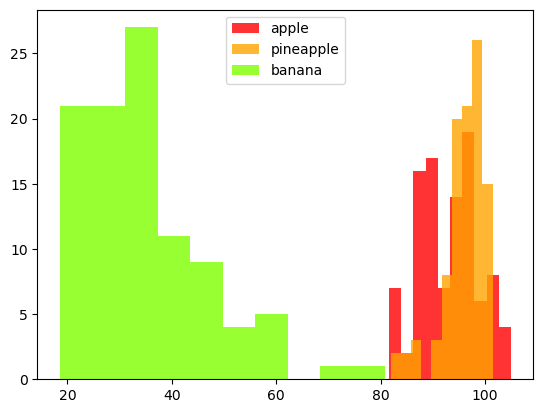

In [77]:
# alpha : 불투명도 (0에 가까울 수록 투명함)
temp_bin = 10
plt.hist(np.mean(apple, axis=1), bins=temp_bin, alpha=0.8, color='red')
plt.hist(np.mean(pineapple, axis=1), bins=temp_bin, alpha=0.8, color='orange')
plt.hist(np.mean(banana, axis=1), bins=temp_bin, alpha=0.8, color='chartreuse')
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

# x축은 데이터의 값이, y축은 그 빈도수
# 각 요소별로 10개의 막대를 가졌음

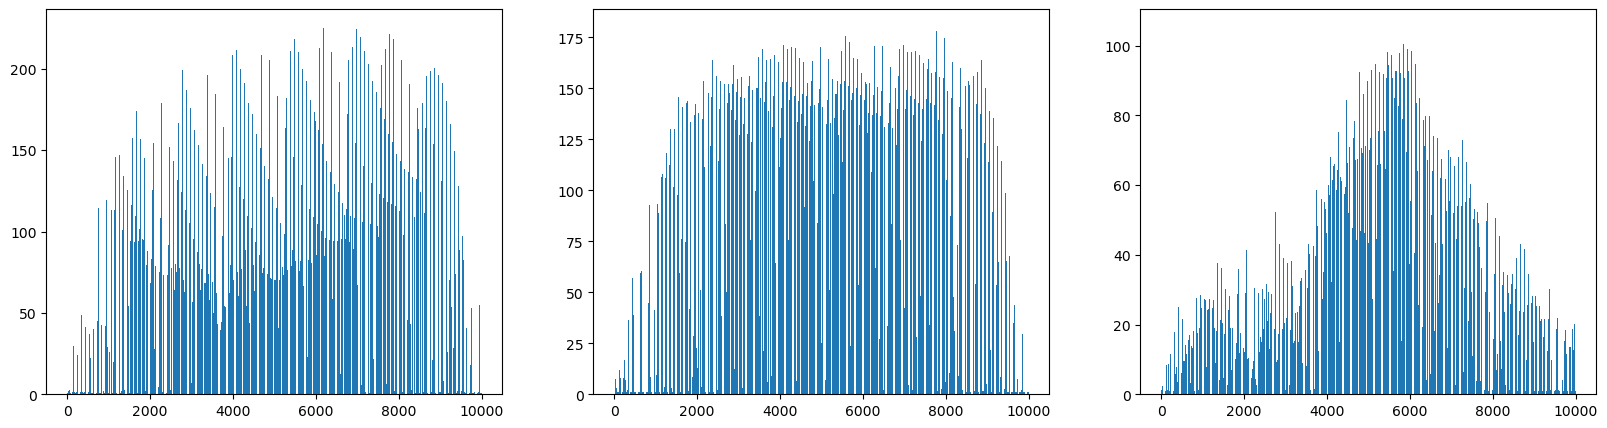

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

| 항목                | 첫 번째 코드 (히스토그램)                                           | 두 번째 코드 (막대그래프)                                           |
|-------------------|-----------------------------------------------------------|------------------------------------------------------------|
| **목표**            | 각 과일 이미지들의 평균값의 **분포** 시각화                         | 각 과일 이미지들의 **각 픽셀의 평균값** 시각화                        |
| **x축**             | 각 구간의 **범위** (각 과일의 평균값을 10개의 구간으로 나누어 나타냄) | **픽셀 인덱스** (0부터 9999까지)                                   |
| **y축**             | 각 구간에 해당하는 **빈도수** (해당 구간에 포함된 데이터의 개수)        | 각 픽셀의 **평균값**                                              |
| **그래프 종류**     | **히스토그램** (빈도수 시각화)                                       | **막대그래프** (픽셀 평균값 시각화)                                 |
| **데이터**          | 각 과일 이미지들의 **전체 평균값**을 구간별로 나누어 빈도수 시각화       | 각 과일 이미지의 **각 픽셀에 대한 평균값**을 시각화                    |


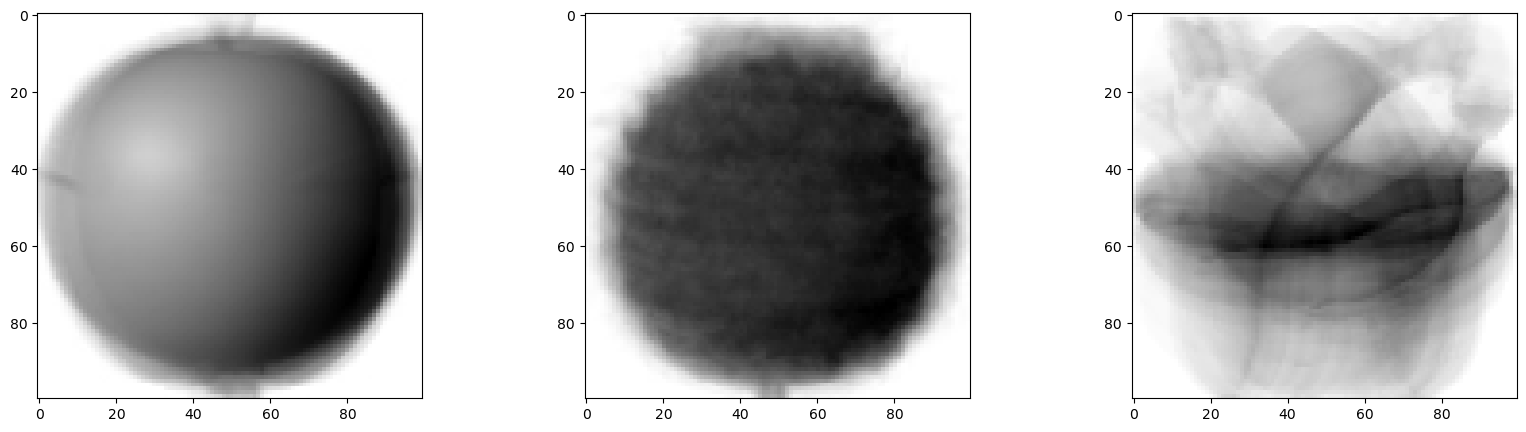

In [35]:
# 각 과일 이미지들의 픽셀 평균값을 계산한 후, 그 평균값을 이미지 형태로 시각화하는 것
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

## 평균값과 가까운 사진 고르기

In [37]:
abs_diff = np.abs(fruits - apple_mean)
# abs_diff의 각 이미지에 대해 모든 픽셀들의 차이의 평균값
# axis=(1, 2)는 첫 번째와 두 번째 축(즉, 가로와 세로 축)에 대한 평균
# 이를 통해 각 이미지의 전체 픽셀 값에 대한 평균 차이를 구하게 됩니다.
abs_mean = np.mean(abs_diff, axis=(1,2))

# 300개의 이미지에 대해 각 이미지가 사과 평균 이미지와 얼마나 차이가 나는지를 나타냄
print(abs_mean.shape)
# (300,)

(300,)


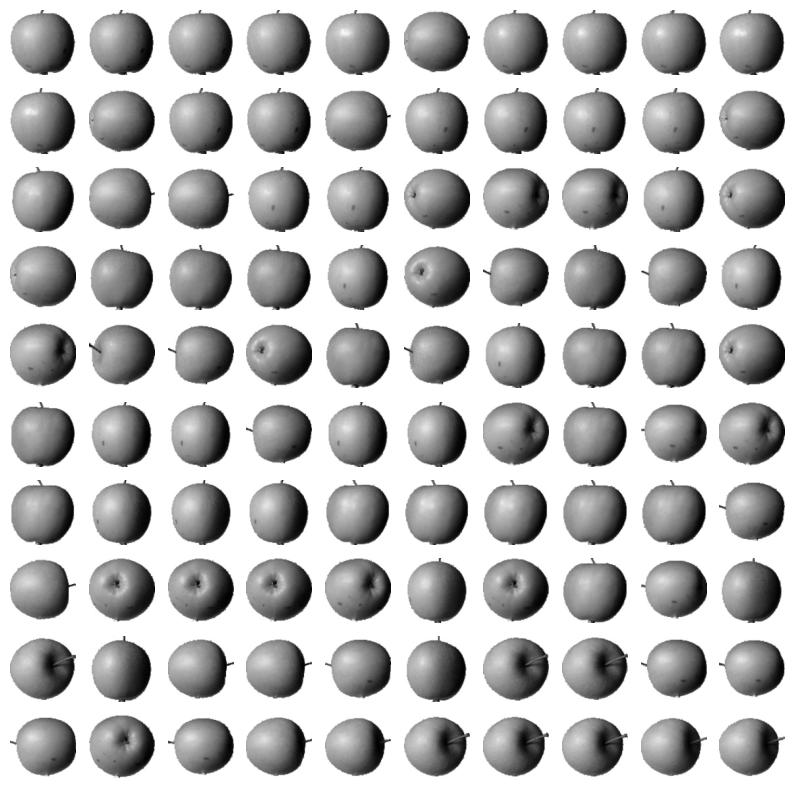

In [39]:
#  사과 이미지와의 차이가 가장 작은 100개의 과일 이미지
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        # axs[i, j].axis('off')**는 각 서브플롯에서 축을 숨기기. => 이미지를 깔끔하게 보여주기 위해 축을 제거
        axs[i, j].axis('off')
plt.show()

## 확인문제

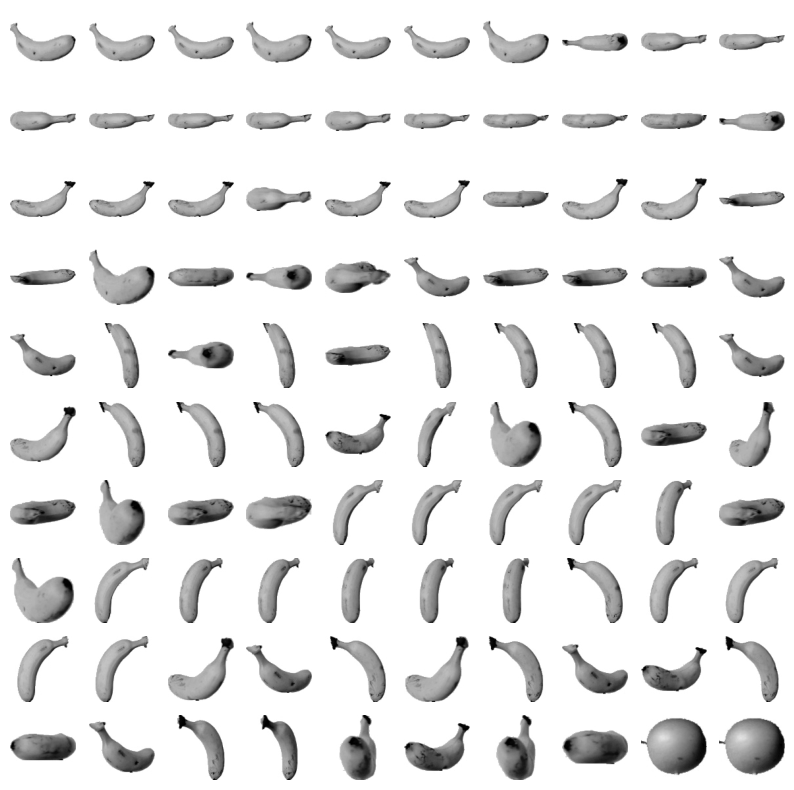

In [42]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

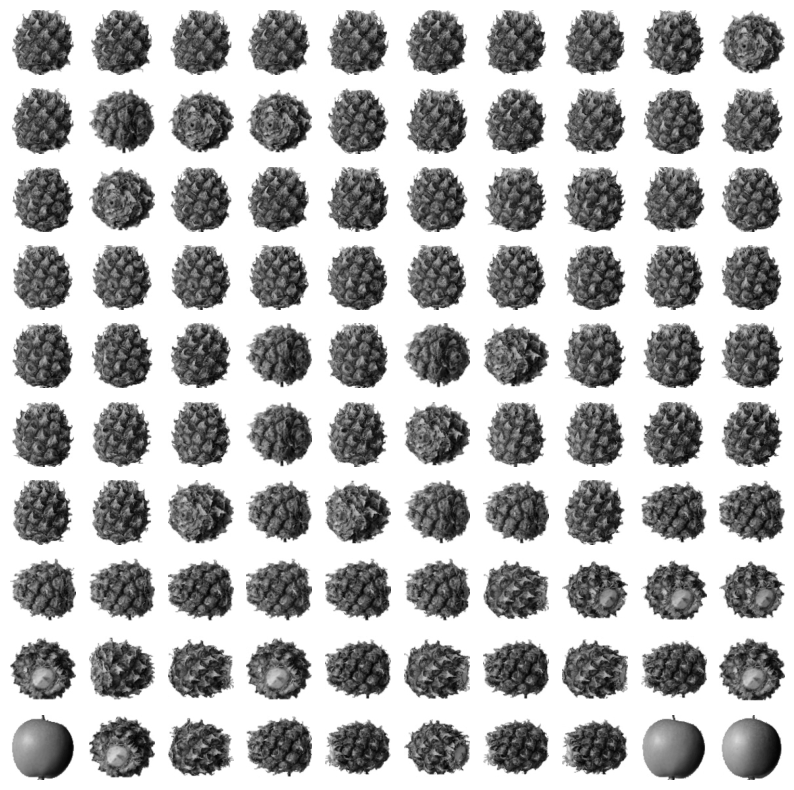

In [82]:
abs_diff = np.abs(fruits - pineapple_mean )
abs_mean = np.mean(abs_diff, axis=(1,2))

painapple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[painapple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

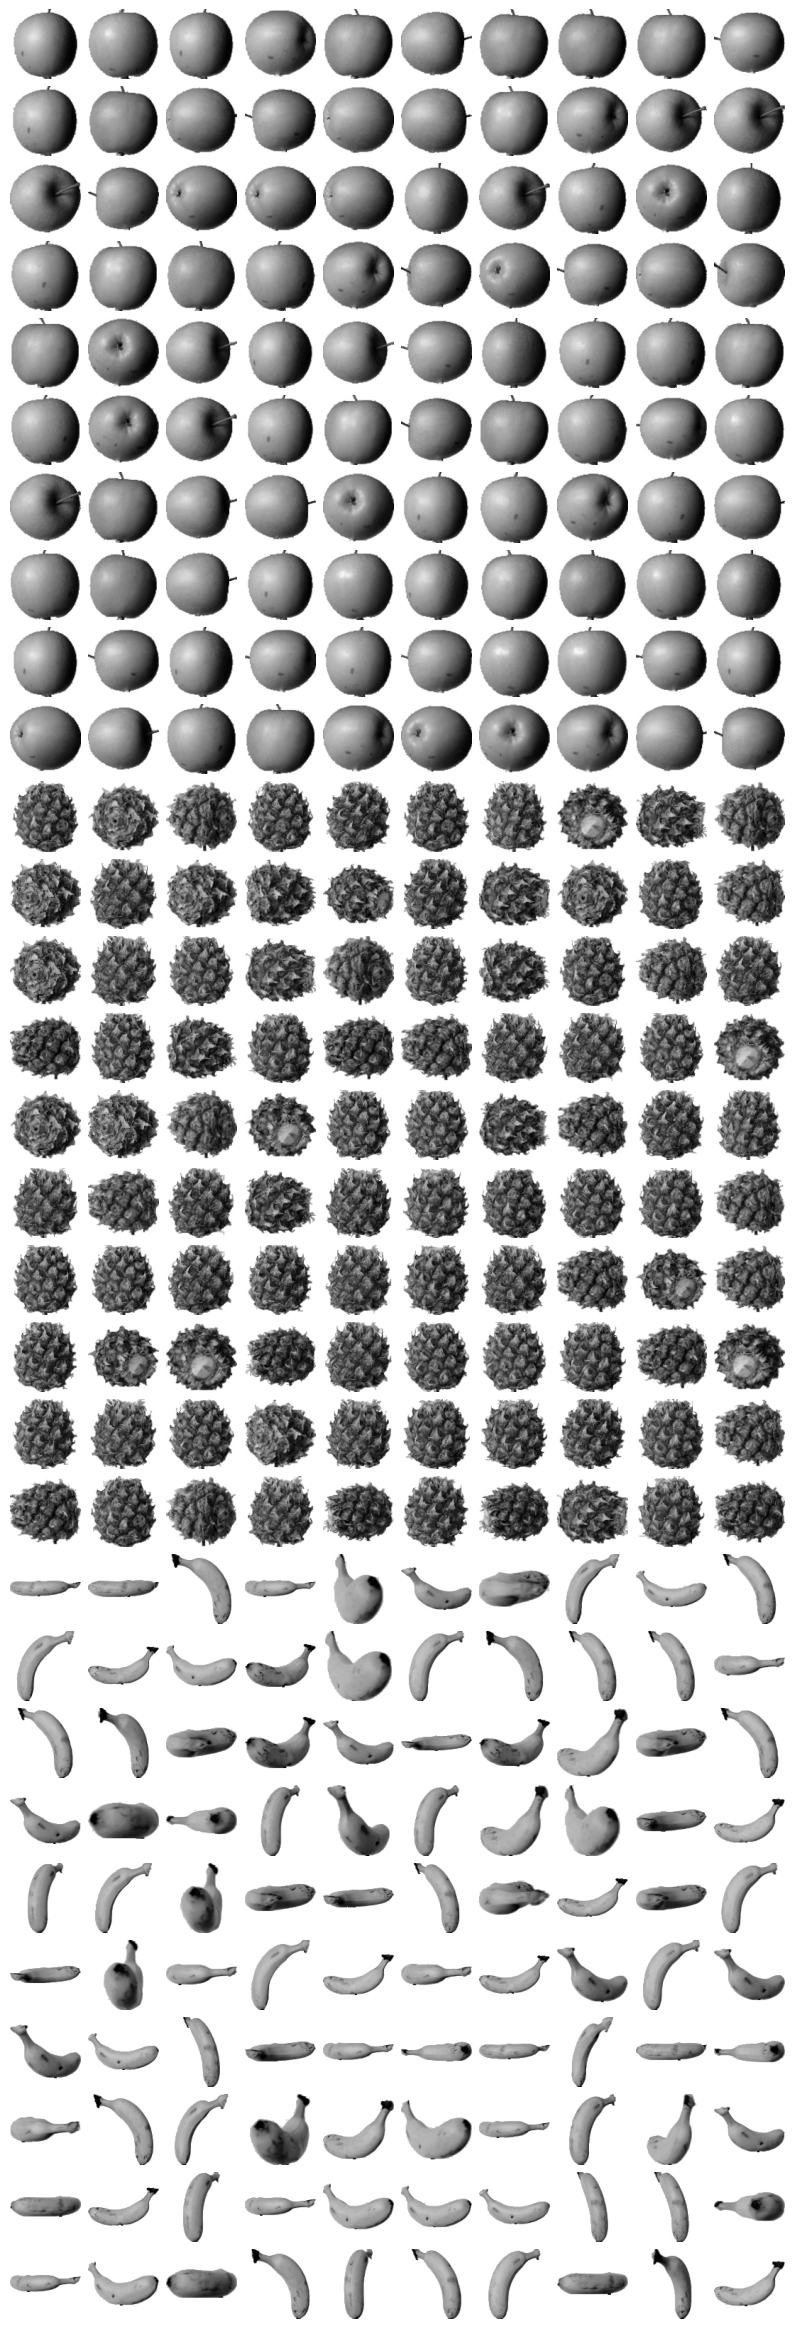

In [90]:
fig, axs = plt.subplots(30, 10, figsize=(10,30))  # 30행, 10열
for i in range(30):
    for j in range(10):
        axs[i, j].imshow(fruits[i * 10 + j], cmap='gray_r')  # fruits에서 이미지 선택
        axs[i, j].axis('off')  # 축 숨기기
plt.subplots_adjust(wspace=0.1, hspace=0.1)  # 서브플롯 간 간격 조정
plt.show()
